# Dynamics

In [112]:
import sympy as sp
from sympy import symbols, Eq, sin, pi, solve, nsolve, N

# ---------- 1) Symbol definitions ----------
x, A, T = symbols('x A T')
pA_x, pA_y = symbols('pA_x pA_y')
pB_x, pB_y = symbols('pB_x pB_y')
r_x, r_y   = symbols('r_x r_y')      # hip joint / middle joint

Leg1, Leg2, Spine, Arm = symbols('Leg1 Leg2 Spine Arm')  # link lengths

# ---------- 2) Numerical values ----------
subs_dict = {
    A: 0.01,        # terrain amplitude
    T: 0.10,       # terrain wavelength
    pA_x: 1,     # x-coordinate of point A
    Leg1: 0.03,    # left leg length
    Leg2: 0.012,    # right leg length
    Spine: 0.2,   # distance between joints 1 and 2
}

# ---------- 3) Terrain profile ----------
h = A * sin(2 * pi * x / T) + A / 2
pA_y = h.subs(x, pA_x)     # y of point A (depends only on pA_x)
pB_y = h.subs(x, pB_x)     # y of point B (symbolic, still depends on pB_x)
subs_dict[pA_y] = pA_y.subs(subs_dict).evalf()
print("pA_x: ", subs_dict[pA_x], " pA_y: ", subs_dict[pA_y])

# ---------- 4) Arm length constraint (scalar) ----------
eqArm = Eq(Arm, Spine**2 / sp.sqrt(Spine**2 + (Leg2 - Leg1)**2))
Arm_val = N(eqArm.rhs.subs(subs_dict))   # compute Arm numerically
subs_dict[Arm] = Arm_val                 # store back to dict
print("Arm: ", subs_dict[Arm])

# ---------- 5) B point must be Arm away from A ----------
eqB = Eq((pB_x - pA_x)**2 + (pB_y - pA_y)**2, Arm**2)
subs_dict[pB_x] = nsolve(eqB.subs(subs_dict), pB_x, subs_dict[pA_x] + 0.2)
subs_dict[pB_y] = pB_y.subs(subs_dict).evalf()
print("pB_x: ", subs_dict[pB_x], " pB_y: ", subs_dict[pB_y])

# ---------- 6) local geometry ----------
beta = symbols("beta")
expr_beta = beta - sp.acos(((pB_x + Leg2 * sp.sin(beta)) - (pA_x + Leg1 * sp.sin(beta))) / Spine)
subs_dict[beta] = nsolve(expr_beta.subs(subs_dict), beta, 0.5)
print(subs_dict[beta])

pA_x:  1  pA_y:  0.00500000000000000
Arm:  0.199194887768646
pB_x:  1.19919424495181  pB_y:  0.00449394541487354
0.216635359030177


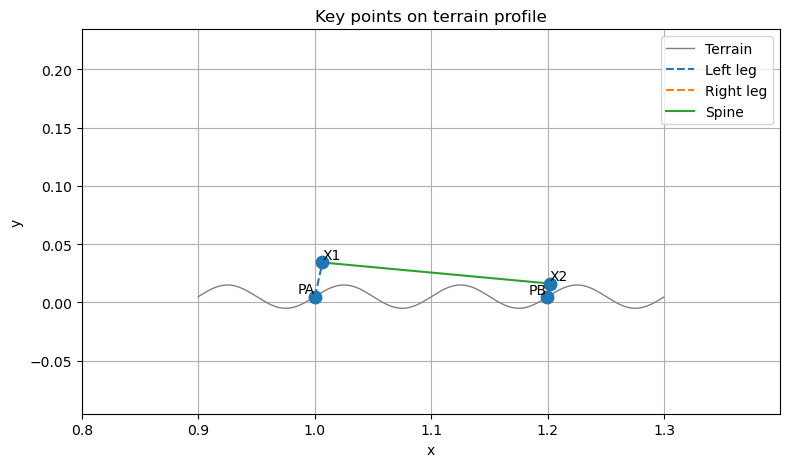

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- 6b) Joint coordinates derived from β ----------
x1, y1, x2, y2 = sp.symbols('x1 y1 x2 y2')

x1_expr = pA_x + Leg1 * sp.sin(beta)
y1_expr = pA_y + Leg1 * sp.cos(beta)

x2_expr = pB_x + Leg2 * sp.sin(beta)
y2_expr = pB_y + Leg2 * sp.cos(beta)

subs_dict[x1] = float(x1_expr.subs(subs_dict))
subs_dict[y1] = float(y1_expr.subs(subs_dict))
subs_dict[x2] = float(x2_expr.subs(subs_dict))
subs_dict[y2] = float(y2_expr.subs(subs_dict))


# ---------- 7) Plot ----------
plt.figure(figsize=(8, 5))

# 1) Generate and plot the terrain curve
x_start = float(subs_dict[pA_x]) - 0.1
x_end   = float(subs_dict[pB_x]) + 0.1
x_vals = np.linspace(x_start, x_end, 300)

terrain_func = sp.lambdify(x, h.subs(subs_dict), modules='numpy')
y_vals = terrain_func(x_vals)
plt.plot(x_vals, y_vals, color='gray', linewidth=1, label='Terrain')

# 2) Plot key points: PA, PB, X1, X2
plt.scatter(
    [subs_dict[pA_x], subs_dict[pB_x], subs_dict[x1], subs_dict[x2]],
    [subs_dict[pA_y], subs_dict[pB_y], subs_dict[y1], subs_dict[y2]],
    s=80, zorder=3
)

# 3) Add text labels for each point
plt.text(subs_dict[pA_x], subs_dict[pA_y], 'PA', ha='right', va='bottom')
plt.text(subs_dict[pB_x], subs_dict[pB_y], 'PB', ha='right', va='bottom')
plt.text(subs_dict[x1],   subs_dict[y1],   'X1', ha='left',  va='bottom')
plt.text(subs_dict[x2],   subs_dict[y2],   'X2', ha='left',  va='bottom')

# 4) Draw lines for left leg, right leg, and spine
plt.plot([subs_dict[pA_x], subs_dict[x1]],
         [subs_dict[pA_y], subs_dict[y1]],
         '--', label='Left leg')

plt.plot([subs_dict[pB_x], subs_dict[x2]],
         [subs_dict[pB_y], subs_dict[y2]],
         '--', label='Right leg')

plt.plot([subs_dict[x1],   subs_dict[x2]],
         [subs_dict[y1],   subs_dict[y2]],
         '-',  label='Spine')

x_min = float(subs_dict[pA_x]) - 0.2
x_max = float(subs_dict[pB_x]) + 0.2
y_min = min(float(subs_dict[pA_y]), float(subs_dict[pB_y])) - 0.1
y_max = max(float(subs_dict[y1]), float(subs_dict[y2]), float(subs_dict[pA_y]), float(subs_dict[pB_y])) + 0.2

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 5) Set aspect ratio, grid, labels, and legend
plt.title('Key points on terrain profile')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
